In [5]:
import numpy as np
import pandas as pd

In [6]:
train_df = pd.read_csv('train_csv.csv')
test_df = pd.read_csv('test.csv.csv')

In [7]:
print(train_df.shape)
print(test_df.shape)

(614, 13)
(367, 12)


In [8]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
train_df.describe(include = ['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [12]:
train_df.isnull().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
train_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [15]:
test_df.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [16]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [17]:
target_map={"Y":1, "N": 0}
dataset=[train_df]
for data in dataset:
    data['Loan_Status']=data['Loan_Status'].map(target_map)

In [18]:
cat_cols=['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in cat_cols:
    train_df[col].fillna(train_df[col].mode()[0],inplace=True)
    test_df[col].fillna(test_df[col].mode()[0],inplace=True)

In [19]:
target = train_df['Loan_Status']
train_df = train_df.drop('Loan_Status',1)

<ipython-input-19-16247dc9ade3>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_df = train_df.drop('Loan_Status',1)


In [20]:
gender_map={"Male": 1,"Female": 0}
marry_map={"Yes":1,"No":0}
education_map={"Graduate": 1,"Not Graduate":0}
property_map={"Semiurban":2,"Urban":1,"Rural":0}
dataset=[train_df]
for data in dataset:
    data['Gender']=data['Gender'].map(gender_map)
    data['Married']=data['Married'].map(marry_map)
    data['Self_Employed']=data['Self_Employed'].map(marry_map)
    data['Education']=data['Education'].map(education_map)
    data['Property_Area']=data['Property_Area'].map(property_map)
#dependents contains numeric value except 3+, so we just need to replace 3+ with 3 and then  convert their type to numeric
train_df = train_df.replace({'Dependents': r'3+'}, {'Dependents': 3}, regex=True)
train_df['Dependents']=train_df['Dependents'].astype('float64')
#test_df = train_df.replace({'Dependents': r'3+'}, {'Dependents': 3},regex=True)
#test_df['Dependents']=test_df['Dependents'].astype('float64')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [21]:
gender_map={"Male": 1,"Female": 0}
marry_map={"Yes":1,"No":0}
education_map={"Graduate": 1,"Not Graduate":0}
property_map={"Semiurban":2,"Urban":1,"Rural":0}
dataset=[test_df]
for data in dataset:
    data['Gender']=data['Gender'].map(gender_map)
    data['Married']=data['Married'].map(marry_map)
    data['Self_Employed']=data['Self_Employed'].map(marry_map)
    data['Education']=data['Education'].map(education_map)
    data['Property_Area']=data['Property_Area'].map(property_map)
#dependents contains numeric value except 3+, so we just need to replace 3+ with 3 and then  convert their type to numeric
test_df = test_df.replace({'Dependents': r'3+'}, {'Dependents': 3},regex=True)
test_df['Dependents']=test_df['Dependents'].astype('float64')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 34.5+ KB


In [22]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [23]:
train_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
dtype: int64

In [24]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [25]:
train_df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [26]:
train_df['Loan_Amount_Term'].fillna(360,inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(),inplace=True)
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [28]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [29]:
test_df['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [30]:
test_df['LoanAmount'].value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64

In [31]:
test_df['Loan_Amount_Term'].fillna(360,inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(),inplace=True)
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 34.5+ KB


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inLine

<ipython-input-34-933dacb02e52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train_df.corr()


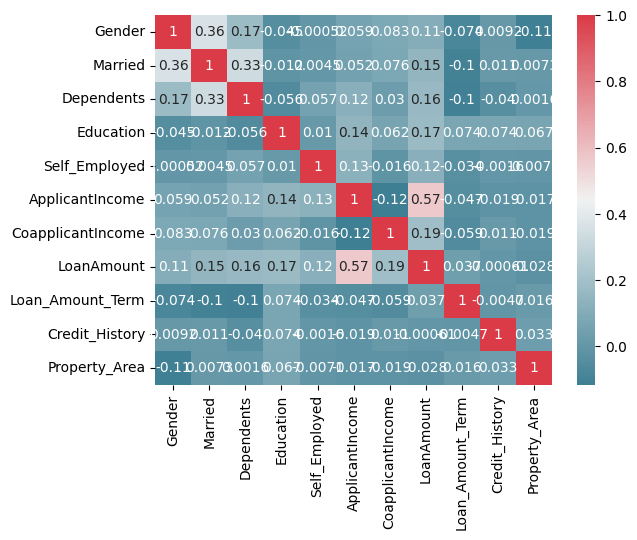

In [34]:
corr=train_df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=colormap,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()

In [35]:
features=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

In [36]:
for fea in features:
    print(train_df[fea].value_counts(sort=True))
    print('---------------------------')

1    502
0    112
Name: Gender, dtype: int64
---------------------------
1    401
0    213
Name: Married, dtype: int64
---------------------------
0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
---------------------------
1    480
0    134
Name: Education, dtype: int64
---------------------------
0    532
1     82
Name: Self_Employed, dtype: int64
---------------------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
---------------------------
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
---------------------------
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int6

In [37]:
fea_normalize=['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']

In [38]:
for fea in fea_normalize:
    train_df[fea]=(train_df[fea])/(train_df[fea].max())

In [39]:
train_df=train_df.drop('Loan_ID',1)

<ipython-input-39-92e6924f2b97>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_df=train_df.drop('Loan_ID',1)


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train,y_val= train_test_split(train_df,target,test_size=0.30, random_state=np.random.randint(0,100))

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [43]:
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
from sklearn import metrics

In [45]:
y_pred=lr.predict(X_val)
acc = metrics.accuracy_score(y_val,y_pred)
print(acc)

0.8216216216216217


In [46]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [49]:
GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [50]:
y_pred_cv=clf.predict(X_val)
acc = metrics.accuracy_score(y_val,y_pred_cv)
print(acc)

0.8216216216216217


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [52]:
dt_base=DecisionTreeClassifier(max_depth=10,random_state=4)
dt_base.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=4)

In [53]:
from sklearn import metrics

In [54]:
y_pred=dt_base.predict(X_val)
acc = metrics.accuracy_score(y_val,y_pred)
print(acc)

0.7621621621621621


In [55]:
dt_base.tree_.node_count

131

In [56]:
param_grid = {
    'max_depth' : range(4,25),
    'min_samples_leaf' : range(20,200,10),
    'min_samples_split' : range(20,200,10),
    'criterion' : ['gini','entropy']
}
n_folds = 5

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
dt = DecisionTreeClassifier(random_state=np.random.randint(0,100))
grid = GridSearchCV(dt, param_grid, cv = n_folds, return_train_score=True,verbose=3)
#grid.fit(X_train,y_train)

In [59]:
best_tree=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=20,min_samples_split=80,random_state=np.random.randint(0,100))
best_tree.fit(X_train,y_train)
y_pred_best=best_tree.predict(X_val)

In [60]:
acc = metrics.accuracy_score(y_val,y_pred)
print(acc)

0.7621621621621621


In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 34.5+ KB


In [62]:
loanID=test_df['Loan_ID']
test_df=test_df.drop('Loan_ID',1)

<ipython-input-62-63e0ff87d95d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_df=test_df.drop('Loan_ID',1)


In [63]:
y_pred_t=lr.predict(test_df)
y_final=[]
for y in y_pred_t:
    if y==1:
        y_final.append("Y")
    elif y==0:
        y_final.append("N")
y_best=np.array(y_final)
type(y_best)


numpy.ndarray

In [64]:
submission = pd.DataFrame({
        "Loan_ID": loanID,
        "Loan_Status": y_best
    })
submission.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
5,LP001054,N
6,LP001055,Y
7,LP001056,Y
8,LP001059,Y
9,LP001067,N


In [65]:
submission.to_csv('submission_lr.csv', index=False)